<a href="https://colab.research.google.com/github/realRSB/AudioML/blob/main/AudioPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob # finds pathnames

# the main package to uwork with audio data
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

# making plots look nicer
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


# Important to know about audio stuff



*   Frequency is difference between wave lengths
*   Intesity is how high the waves go too
*   Sample rate is how frequent samples of audio file is taken out by. Think of it as sound quality





In [ ]:
# We can import audio files from any folder
# audio_files = glob('get all audio files')

In [8]:
# Play audio file
ipd.Audio('test.wav')

In [10]:
# actually read in a file
# y = raw data, SR is going to be int of sample rate
y, sr = librosa.load('test.wav')
print(f'y {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (671261,)
sr: 22050


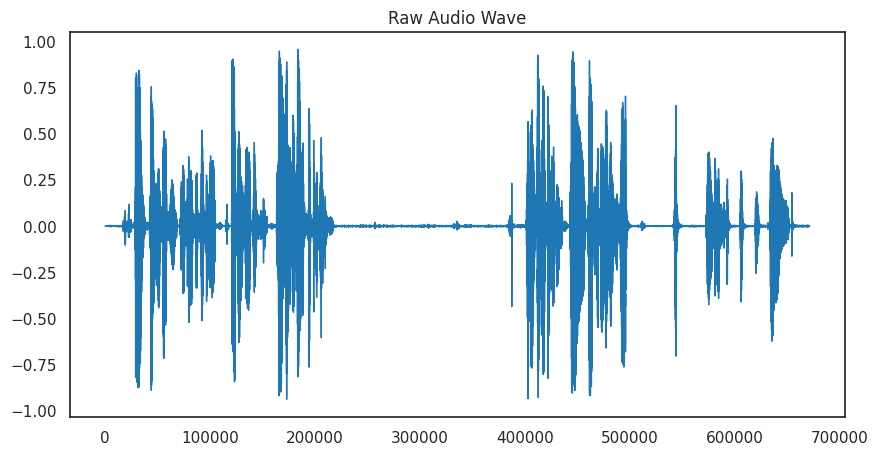

In [14]:
# Plotting raw audio data
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Wave',
                  color=color_pal[0])
plt.show()

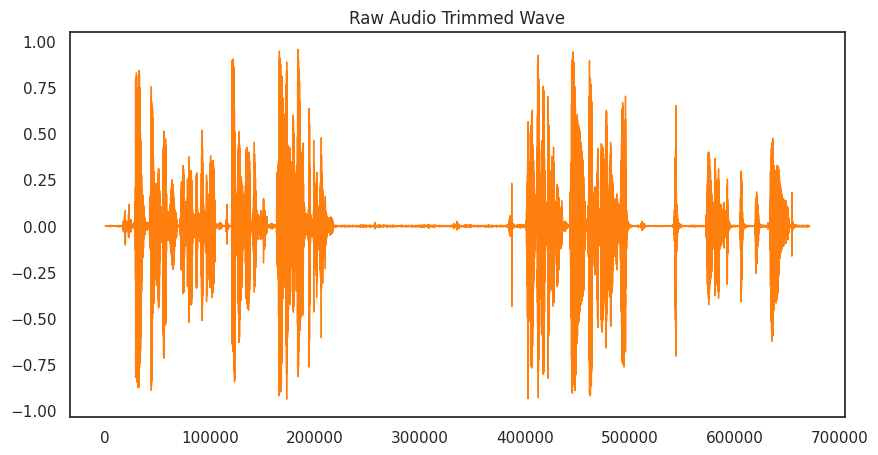

In [17]:
# Trimming sections where silence < 20 decibels
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Wave',
                  color=color_pal[1])
plt.show()

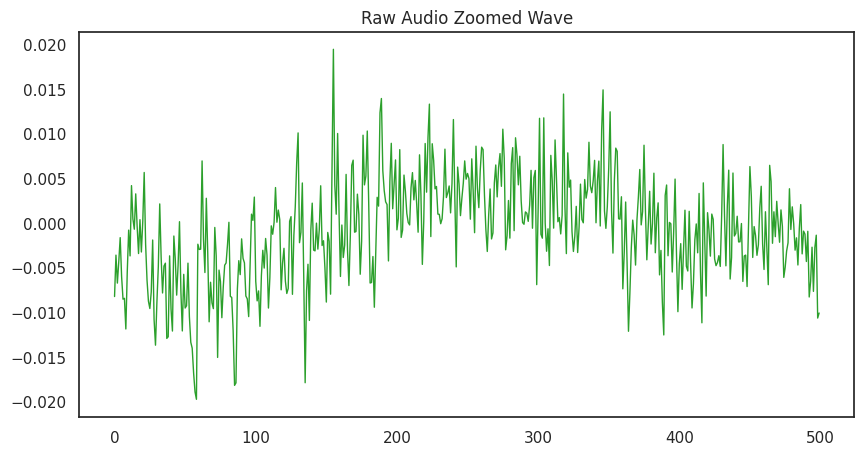

In [19]:
# Manually zooming in into specific area
pd.Series(y[20000:20500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed Wave',
                  color=color_pal[2])
plt.show()

In [23]:
# Spectogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 1312)

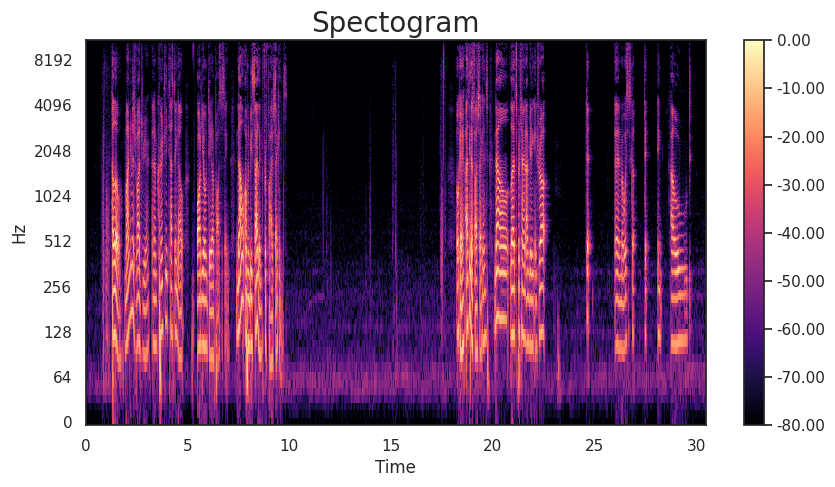

In [26]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [29]:
# Mell Spectogram
S = librosa.feature.melspectrogram(y=y,
                               sr=sr,
                               n_mels=128)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

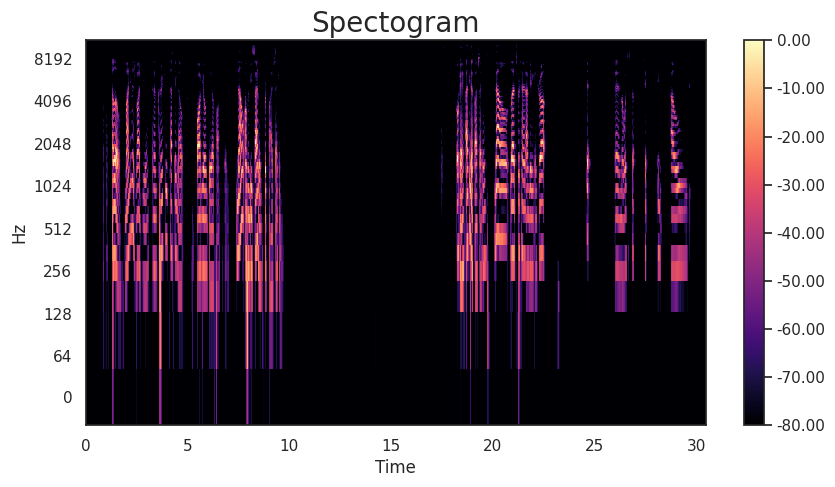

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the Mel Spectogram
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [31]:
# We can now use this to feed into ML model
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)